In [105]:
import pyvisa
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd
from matplotlib import ticker
import matplotlib.lines as mlines
from  devise.Keithley_2450 import *
import time 

In [16]:
time.sleep(0.5)

In [17]:
rm = pyvisa.ResourceManager()
# pyvisa.log_to_screen()
res = rm.list_resources(query='?*')
res
#оюрашаемся к USB узнаем устройства

('USB0::0x05E6::0x2450::04131625::INSTR',
 'USB0::0x1AB1::0x0640::DG5T185350021::0::INSTR',
 'USB::0x05E6::0x2450::04131625::INSTR')

In [87]:
smu = rm.open_resource(res[0])

In [123]:
def measure_current(value, compliance, sleep_time):
        smu.write("SOUR:FUNC VOLT")
        smu.write(f"SOUR:volt {value}")
        smu.write(f"SOURce:VOLT:ILIM {compliance}")
        time.sleep(sleep_time)
        I = float(smu.query(':MEASure:CURR?')) * 1000
        return I 
        
        

In [72]:
def setup_source(smu, v_range, delay):
    smu.write(f'SOUR:VOLT:RANG:AUTO OFF')
    smu.write(f'SOUR:VOLT:RANG {v_range}')
    smu.write(f'SOUR:VOLT:DEL:AUTO OFF')
    smu.write(f'SOUR:VOLT:DEL {delay}')
    

In [110]:
def get_traces(smu, buffer="defbuffer1"):
        smu.write(f':TRACe:ACTual:END? "{buffer}"')
        ending_index = int(smu.read())
        smu.write(f':TRAce:DATA? 1, {ending_index}, "{buffer}", RELative, SOURce, READing')
        result = smu.read()
        result = result.split(',')
        result = list(map(float, result))
        data = {
            'time': result[::3],
            'source': result[1::3],
            'reading': result[2::3]
        }
        return data

In [49]:

time.sleep(0.5)
I = float(smu.query(':MEASure:CURR?')) * 1000


In [130]:
smu.write(f'SOUR:FUNC VOLT')
#set_voltage(self, value(значения напряжения), compliance(ограничение по току)):
#set_voltage(1, 0.1)
smu.write("OUTPut:STATe ON")
time.sleep(2.5)
I_values = []
for i in range(100):
        #measure_current(value, compliance, sleep_time):
        I = measure_current(1,0.1,0.05)
        I_values.append(I)
        print(I)
print(I_values)  
smu.write("OUTPut:STATe OFF")

0.6915579
0.6915584
0.6915591999999999
0.6915588
0.6915589
0.6915581999999999
0.6915584
0.691559
0.6915594
0.6915584
0.6915581000000001
0.6915583
0.6915588
0.6915586
0.6915585
0.6915587
0.6915591999999999
0.6915595
0.6915588
0.6915589
0.6915595
0.6915594
0.6915597
0.6915594
0.6915589
0.6915584
0.6915581999999999
0.6915574
0.6915565
0.6915567
0.6915565
0.6915557
0.6915553000000001
0.6915542
0.6915541
0.6915536
0.6915539
0.6915532
0.6915530999999999
0.6915532
0.6915533
0.691553
0.6915529
0.6915528
0.6915530999999999
0.6915528
0.6915529
0.6915530999999999
0.6915530999999999
0.6915532
0.6915536
0.6915533
0.6915533
0.6915530999999999
0.6915537
0.6915537
0.6915539
0.6915536
0.6915533
0.6915533
0.6915532
0.6915541
0.6915539
0.6915543000000001
0.6915544
0.6915545
0.6915546
0.6915546
0.6915544
0.6915544
0.6915555
0.6915555
0.6915553000000001
0.6915558
0.6915553999999999
0.691556
0.6915564
0.6915561
0.691557
0.6915572000000001
0.6915568
0.6915575
0.6915562000000001
0.6915568
0.6915567
0.6915564


18

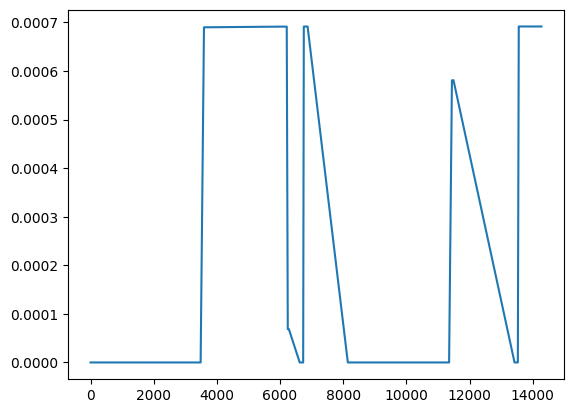

In [134]:
data_all=[]
data_t = []
data = get_traces(smu)
data_all.append(data["reading"])
data_t.append(data["time"])
data_t_array = np.array(data_t[0])
data_all_array = np.array(data_all[0])
#data_t_array
#data_all

data_t_array = np.array(data_t[0])
data_all_array = np.array(data_all[0])
# da = da[1::]
plt.plot(data_t_array,data_all_array)


In [ ]:
I = np.array([])
for i in range(10):
        I = measure(I[i])
        I = np.append(I, [I])
print(I)
 